# MNIST Classification using CNN
https://keras.io/examples/vision/image_classification_from_scratch/

# Headers

In [ ]:
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers

# Load Data

In [ ]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#check image shape
print(x_train[0].shape)

(28, 28)


In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

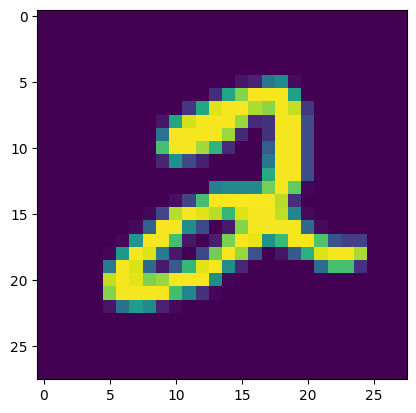

In [ ]:
#plot the first image in the dataset
plt.imshow(x_train[5])

In [ ]:
print(x_train[1].shape)
print(x_train.shape)
print(x_train.shape[0])

(28, 28)
(60000, 28, 28)
60000


In [ ]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
#print(y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
#print(y_train[0])

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
60000 train samples
10000 test samples


# Visualizing the input

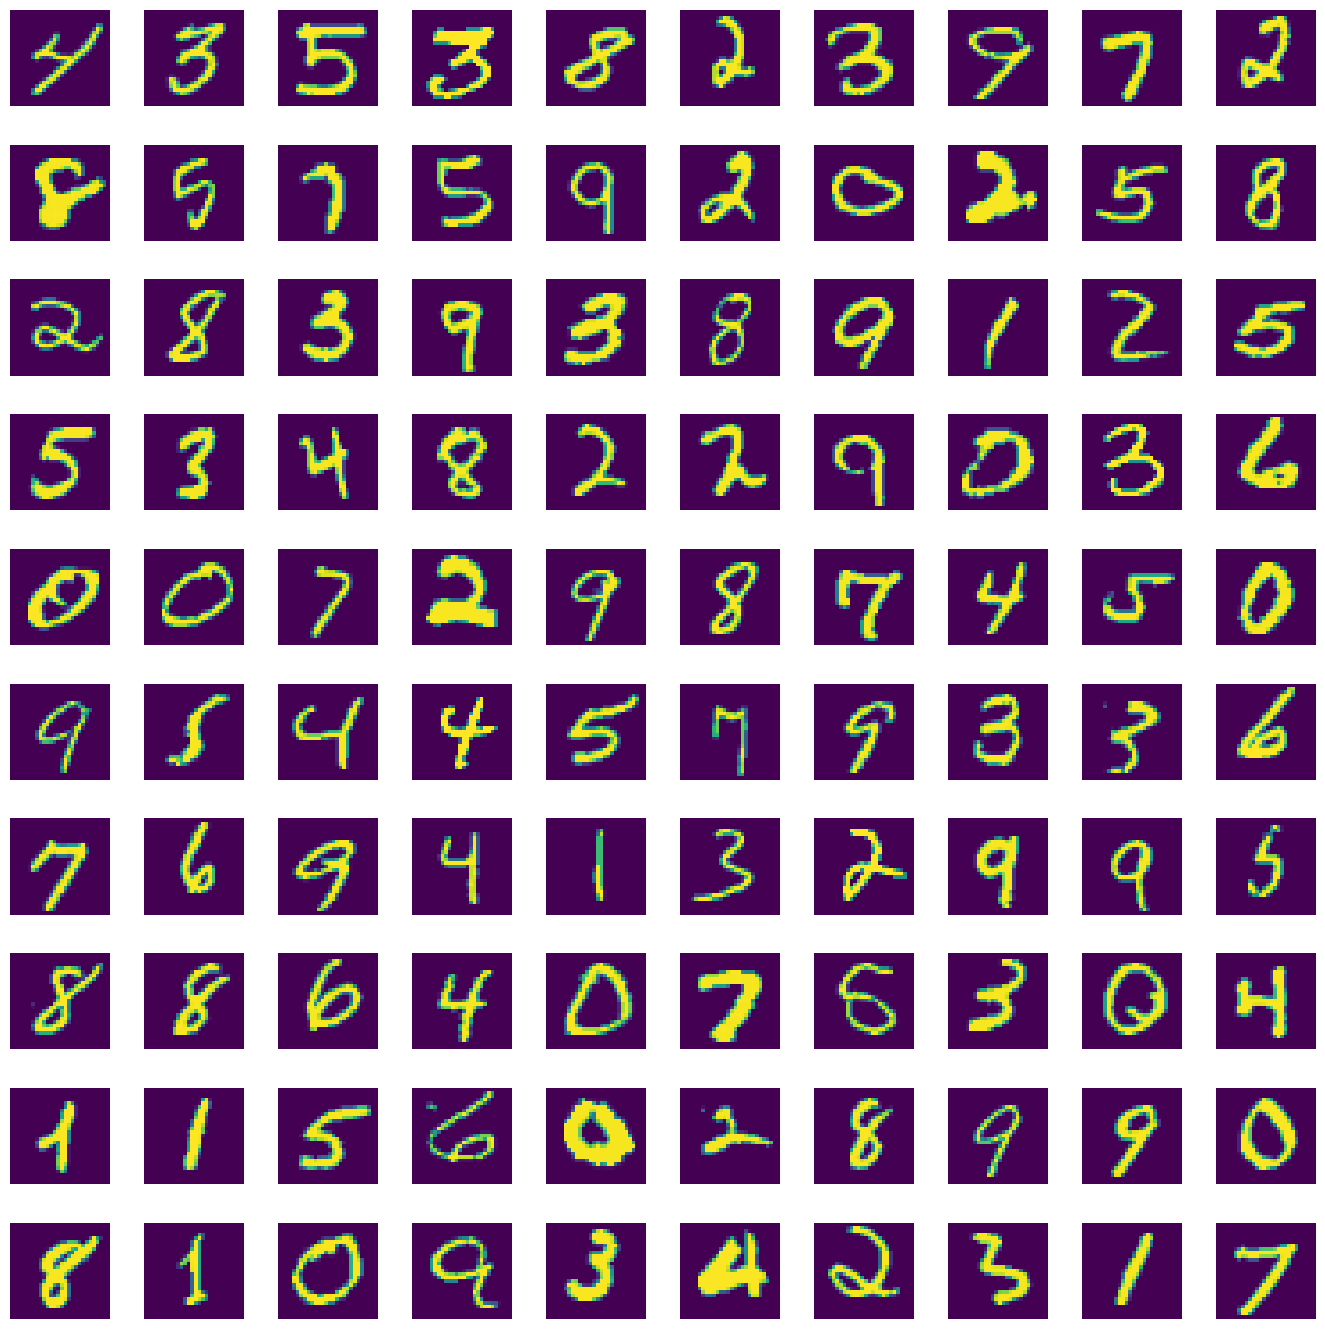

In [ ]:
# Define the labels of the dataset
#labels = ['one', 'two', 'three', 'four', 'five',
#          'six', 'seven', 'eight', 'nine', 'ten']

# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(x_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow(x_train[index,1:])
    label_index = int(y_train[index,1:])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Model Architecture

In [ ]:
model = keras.Sequential()

model.add(Conv2D(filters=32, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(num_classes,activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

# Training and Evaluation

In [ ]:
batch_size = 128
epochs = 15

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 6s 6ms/step - loss: 0.2928 - accuracy: 0.9196 - val_loss: 0.0740 - val_accuracy: 0.9798
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0770 - accuracy: 0.9766 - val_loss: 0.0574 - val_accuracy: 0.9858
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0557 - accuracy: 0.9830 - val_loss: 0.0498 - val_accuracy: 0.9865
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0464 - accuracy: 0.9859 - val_loss: 0.0438 - val_accuracy: 0.9870
Epoch 5/15
422/422 [==============================] - 2s 6ms/step - loss: 0.0390 - accuracy: 0.9875 - val_loss: 0.0396 - val_accuracy: 0.9892
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0326 - accuracy: 0.9895 - val_loss: 0.0384 - val_accuracy: 0.9892
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0286 - accuracy: 0.9909 - val_loss: 0.0450 - val_accuracy: 0.9872
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03681961074471474
Test accuracy: 0.9889000058174133
